In [1]:
import os, sys
import io
import requests
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage as ski

# local library of functions to connect to image server
import libutils.use_server as server

# A notebook to look at an image

In [2]:
img_path = server.init()  # initiate the global (privatevariables for the database

server : http://imgserver.10.68.0.250.nip.io/data/andra


Status Code 200
nombre de fichiers disponibles 227
/data/andra/Photos/FUG2020-06_0009-OHZ7120_0437_0537.jpg
/data/andra/Photos/FUG2020-06_0009-OHZ7120_0074_0196.jpg
/data/andra/Photos/FUG2020-06_0009-OHZ6322_0931_1043.jpg
/data/andra/Photos/FUG2020-06_0009-OHZ7120_1497_1614.jpg
/data/andra/Photos/FUG2020-06_0009-OHZ6322_0257_0377.jpg
/data/andra/Photos/FUG2020-07_0009-OHZ7000_2997_3117.jpg
/data/andra/Photos/FUG2020-07_0009-OHZ7000_3241_3305.jpg
/data/andra/Photos/FUG2020-07_0009-OHZ7000_1858_1980.jpg
/data/andra/Photos/FUG2020-08_0009-OHZ6300_0776_0875.jpg
/data/andra/Photos/FUG2020-06_0009-OHZ7120_3457_3547.jpg
Status Code 200
image /data/andra/Photos/FUG2020-07_0009-OHZ7000_3368_3488.jpg(61) de taille (5184, 939)


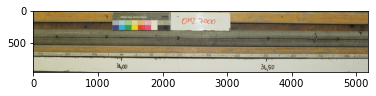

In [5]:
files = server.get_list(img_path)
print("nombre de fichiers disponibles", len(files))
for i in range(10):
    print(files[i])

idx = int(random.random()*len(files))

img = server.get_file(files[idx])
print(f"image {files[idx]}({idx}) de taille {img.size}")
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

Convert image to numpy array to have a look at it

In [6]:
image = np.array(img)

Plot the red, green, and blue channels to see if the core is easily recognised

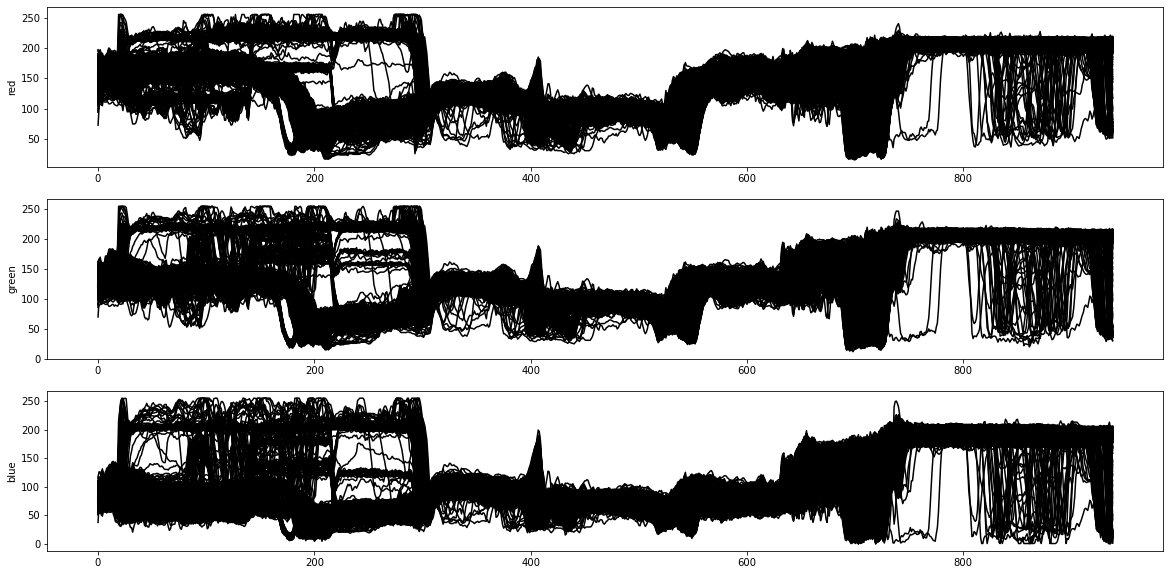

In [7]:
colors = ('red', 'green', 'blue')
channel_ids = [0, 1, 2]

plt.figure(figsize=[20,10])
for row in range(0, np.shape(image)[1], 10):
    for channel_id in channel_ids:
        plt.subplot(3, 1, channel_id + 1)
        plt.plot(image[:, row, channel_id], 'k')
for channel_id in channel_ids:
    plt.subplot(3, 1, channel_id + 1)
    plt.ylabel(colors[channel_id])
plt.show()

Status Code 200
image /data/andra/Photos OHZ1304/GTR2010-01_0002_OHZ1304_2560_2680.jpg(207) de taille (3456, 645)


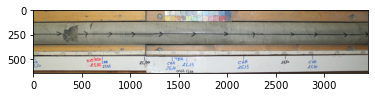

In [9]:
idx = int(random.random()*len(files))

img = server.get_file(files[idx])
print(f"image {files[idx]}({idx}) de taille {img.size}")
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

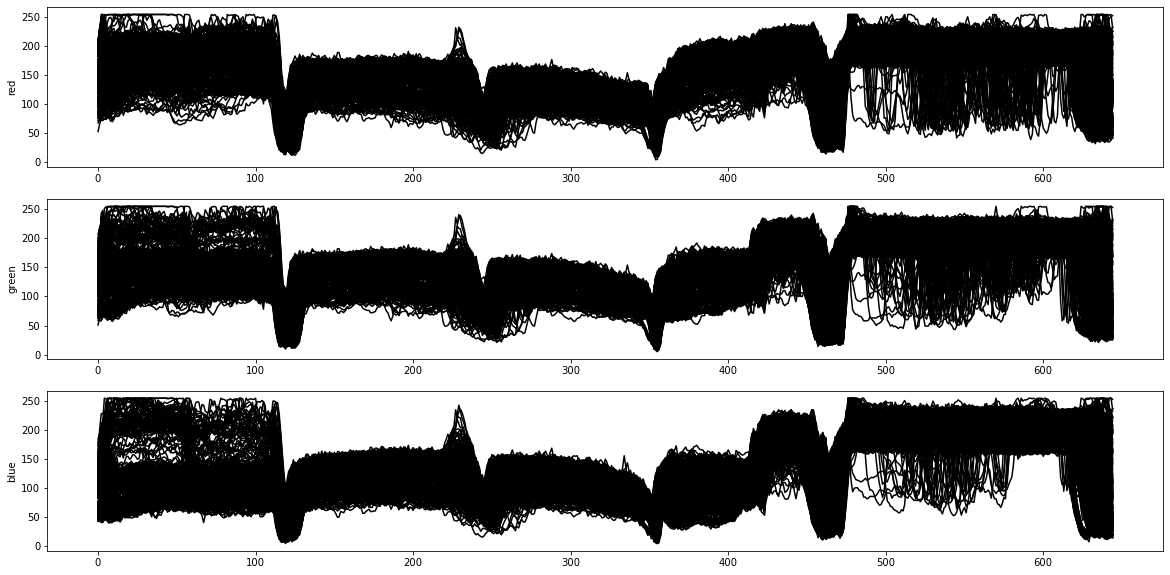

In [10]:
image = np.array(img)

plt.figure(figsize=[20,10])
for row in range(0, np.shape(image)[1], 10):
    for channel_id in channel_ids:
        plt.subplot(3, 1, channel_id + 1)
        plt.plot(image[:, row, channel_id], 'k')
for channel_id in channel_ids:
    plt.subplot(3, 1, channel_id + 1)
    plt.ylabel(colors[channel_id])
plt.show()